<a href="https://colab.research.google.com/github/nishabidla/Google-Colab/blob/main/Image_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


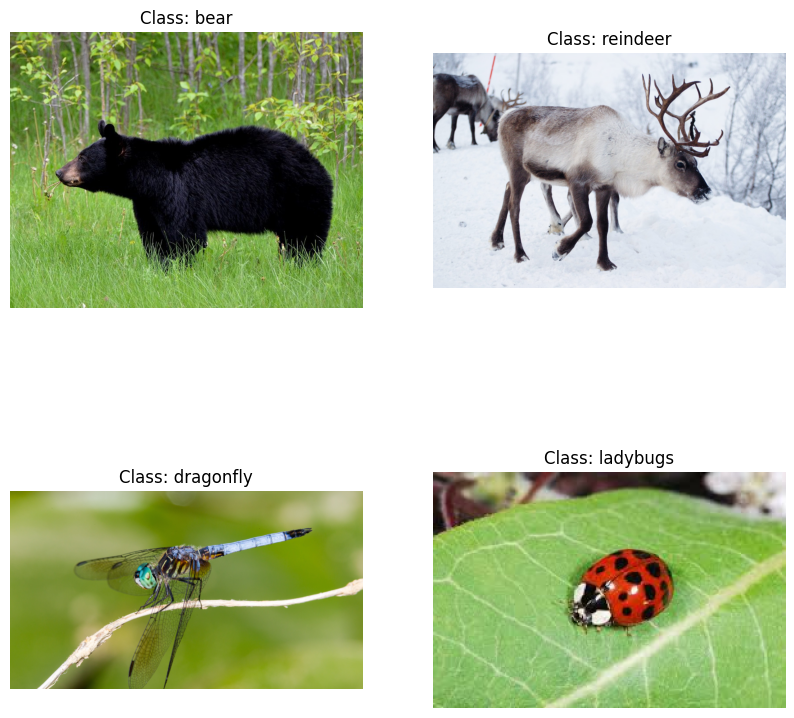

In [3]:
# Code for dataset exploration
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

dataset_path = "/content/drive/MyDrive/archive (2)/animals/animals"

# Get a list of all classes
classes = os.listdir(dataset_path)

# Display random samples from different classes
plt.figure(figsize=(10, 10))
for i in range(4):
    class_name = random.choice(classes)
    class_path = os.path.join(dataset_path, class_name)
    image_name = random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, image_name)
    image = Image.open(image_path)
    plt.subplot(2, 2, i + 1)
    plt.imshow(image)
    plt.title(f"Class: {class_name}")
    plt.axis("off")
plt.show()


In [4]:
# Import necessary libraries
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


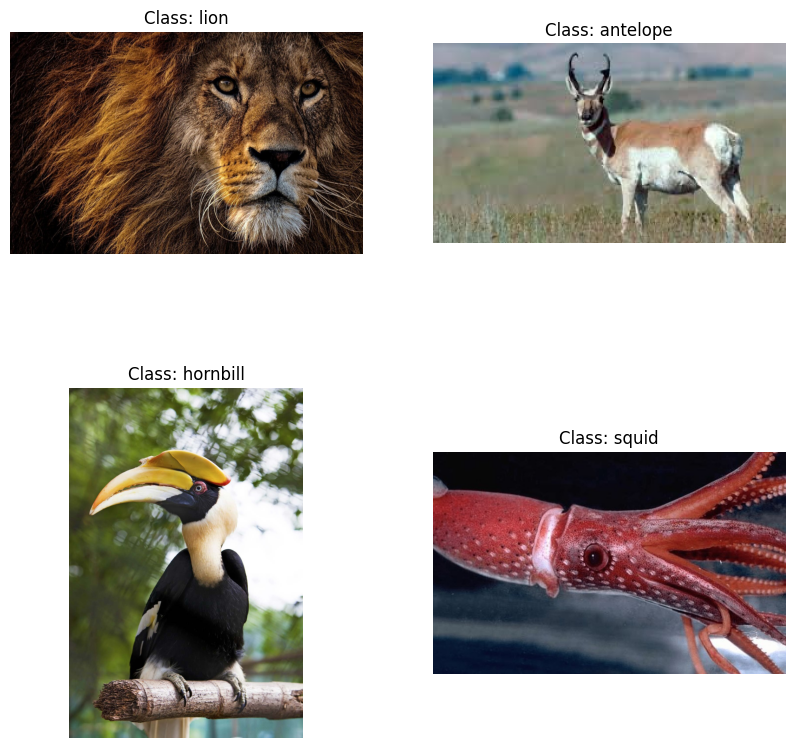

In [5]:
# Specify the path to your organized dataset on Google Drive
dataset_path = "/content/drive/MyDrive/archive (2)/animals/animals"

# Section 1: Dataset Exploration
classes = os.listdir(dataset_path)

plt.figure(figsize=(10, 10))
for i in range(4):
    class_name = random.choice(classes)
    class_path = os.path.join(dataset_path, class_name)
    image_name = random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, image_name)
    image = Image.open(image_path)
    plt.subplot(2, 2, i + 1)
    plt.imshow(image)
    plt.title(f"Class: {class_name}")
    plt.axis("off")
plt.show()

In [6]:
# Data Preprocessing

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the dataset will be used for validation
)

In [7]:
# Create a data generator for training and validation
data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use the entire dataset for training
)

Found 4329 images belonging to 90 classes.


In [8]:
# Model development using TensorFlow/Keras
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(data_generator.class_indices), activation='softmax'))

In [9]:
# Model training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(data_generator, epochs=5)

Epoch 1/5
136/136 [==============================] - 1151s 8s/step - loss: 4.4297 - accuracy: 0.0259
Epoch 2/5
136/136 [==============================] - 341s 2s/step - loss: 4.1834 - accuracy: 0.0531
Epoch 3/5
136/136 [==============================] - 348s 3s/step - loss: 3.8652 - accuracy: 0.1130
Epoch 4/5
136/136 [==============================] - 338s 2s/step - loss: 3.4594 - accuracy: 0.1836
Epoch 5/5
136/136 [==============================] - 349s 3s/step - loss: 3.0970 - accuracy: 0.2654


In [10]:
# Evaluate the model using relevant metrics
test_data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # 20% of the dataset will be used for validation
)

Found 1081 images belonging to 90 classes.


In [11]:
# Predict on the validation set
predictions = model.predict(test_data_generator)
y_true = test_data_generator.classes
y_pred = predictions.argmax(axis=1)

34/34 [==============================] - 272s 8s/step


In [12]:
# Print classification report and confusion matrix
print(classification_report(y_true, y_pred))
conf_mat = confusion_matrix(y_true, y_pred)
print(conf_mat)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00        12
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00        12
          12       0.05      0.08      0.06        12
          13       0.00      0.00      0.00        12
          14       0.00      0.00      0.00        12
          15       0.00      0.00      0.00        12
          16       0.06      0.25      0.10        12
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


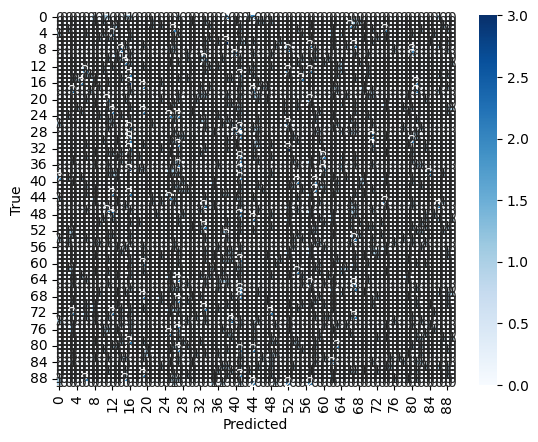

In [13]:
# Plot confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate additional evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# Print the calculated metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.010175763182238668
Precision: 0.005318664338878089
Recall: 0.010175763182238668
F1-score: 0.006542732562308874


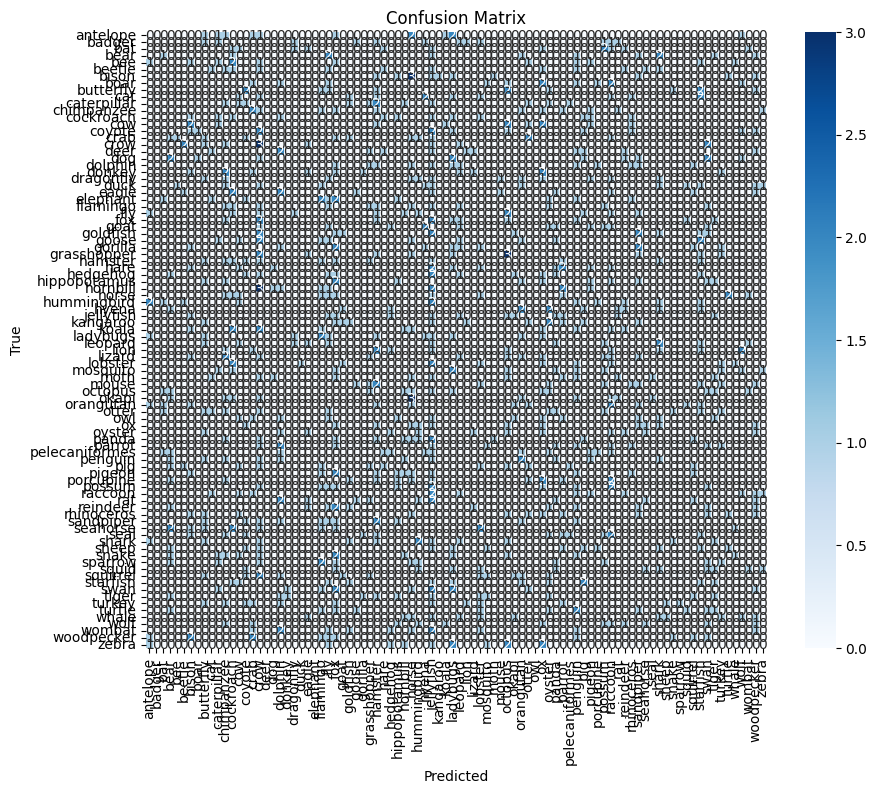

In [16]:
# Visualize the results
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=data_generator.class_indices.keys(), yticklabels=data_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Text(0, 0.5, 'Accuracy')

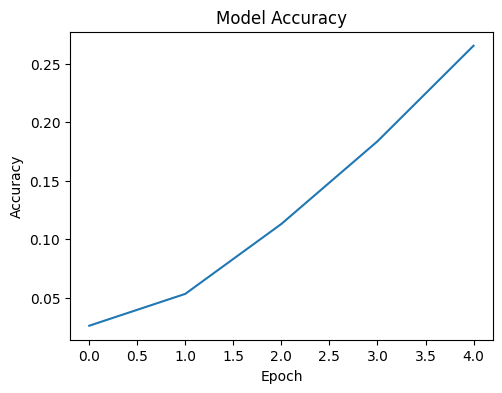

In [17]:

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


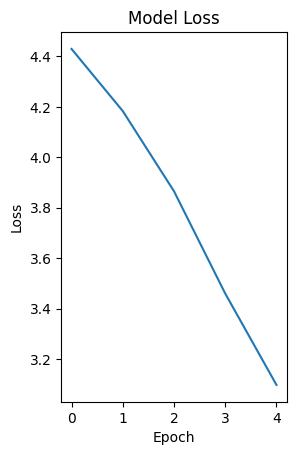

In [18]:

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

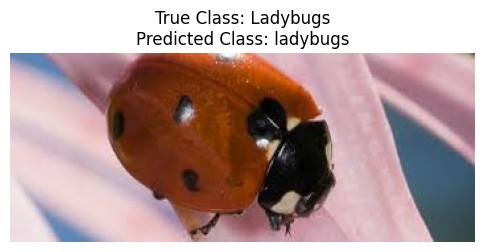

In [62]:
# Select a random ladybug image from the validation set
ladybug_class_index = data_generator.class_indices['ladybugs']
ladybug_images = np.where(y_true == ladybug_class_index)[0]
random_ladybug_index = random.choice(ladybug_images)
random_ladybug_image_path = test_data_generator.filepaths[random_ladybug_index]
random_ladybug_image = Image.open(random_ladybug_image_path)

# Display the selected ladybug image
plt.figure(figsize=(6, 6))
plt.imshow(random_ladybug_image)

# Convert dict_keys to list before indexing
class_labels = list(data_generator.class_indices.keys())
predicted_class_label = class_labels[y_pred[random_ladybug_index]]

plt.title(f"True Class: Ladybugs\nPredicted Class: {predicted_class_label}")
plt.axis("off")
plt.show()

In [63]:
from google.colab import files
from keras.preprocessing import image
from IPython.display import display, Image

# Upload an image file
uploaded = files.upload()

Saving lobster.jpg to lobster.jpg


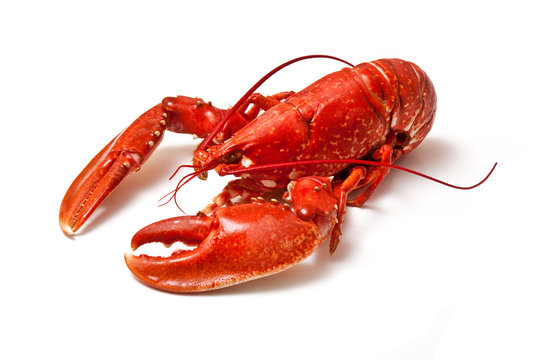

1/1 [==============================] - 0s 34ms/step
Predicted Class: lobster


In [ ]:
# Get the file name of the uploaded image
file_name = next(iter(uploaded))

# Load the uploaded image
img_path = f"/content/{file_name}"
img = image.load_img(img_path, target_size=(224, 224))

# Display the uploaded image
display(Image(filename=img_path))

# Preprocess the image for prediction
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

# Get the class label
class_labels = list(data_generator.class_indices.keys())
predicted_class_label = class_labels[predicted_class_index]

# Display the predicted class label
print(f"Predicted Class: {predicted_class_label}")